In [20]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
#from scipy.spatial.distance import dist

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn 
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [7]:
np.set_printoptions(precision=4,suppress=True)
plt.figure(figsize=(10,3))
%matplotlib.inline
plt.style.use('seaborn-whitegrid')

UsageError: Line magic function `%matplotlib.inline` not found.


<Figure size 720x216 with 0 Axes>

In [9]:
cars=pd.read_csv(r'D:\desktop\Aaaa\mtcars.csv')
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [10]:
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [12]:
X=cars.ix[:,(1,3,4,6)].values
y=cars.ix[:,(9)].values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [14]:
z=linkage(X,'ward')

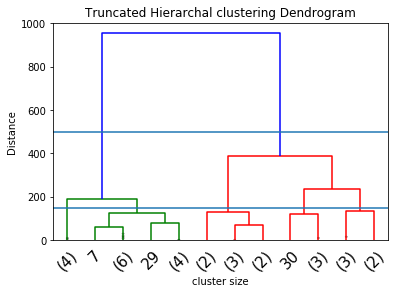

In [16]:
dendrogram(z,truncate_mode='lastp',p=12,color_threshold=None,leaf_font_size=15,leaf_rotation=45,show_contracted=True)
plt.title('Truncated Hierarchal clustering Dendrogram')
plt.xlabel('cluster size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)

plt.show()

In [21]:
k=2

Hclustering=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

Hclustering.fit(X)
sm.accuracy_score(y,Hclustering.labels_)

0.78125

In [22]:

Hclustering=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='average')

Hclustering.fit(X)
sm.accuracy_score(y,Hclustering.labels_)

0.78125

In [23]:

Hclustering=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')

Hclustering.fit(X)
sm.accuracy_score(y,Hclustering.labels_)

0.4375

In [25]:

Hclustering=AgglomerativeClustering(n_clusters=2,affinity='manhattan',linkage='average')

Hclustering.fit(X)
sm.accuracy_score(y,Hclustering.labels_)

0.71875